Steps:
1. generate rollouts over example prompts
2. compute and store activations over all tokens all layers
3. test out each of the hypotheses
4. try make a progress bar

# 1. Generate rollouts over prompts

In [1]:
import vllm
model_name = "google/gemma-2-2b-it"

In [ ]:
# Load Gemma 2 2B Instruct model with vLLM
model_name = "google/gemma-2-2b-it"
llm = vllm.LLM(
    model=model_name,
    trust_remote_code=True
)


INFO 09-27 13:33:56 [__init__.py:216] Automatically detected platform cuda.
INFO 09-27 13:33:57 [utils.py:328] non-default args: {'trust_remote_code': True, 'disable_log_stats': True, 'model': 'google/gemma-2-2b-it'}


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


INFO 09-27 13:34:04 [__init__.py:742] Resolved architecture: Gemma2ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 09-27 13:34:04 [__init__.py:1815] Using max model len 8192
INFO 09-27 13:34:04 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:06 [core.py:654] Waiting for init message from front-end.
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:06 [core.py:76] Initializing a V1 LLM engine (v0.10.2) with config: model='google/gemma-2-2b-it', speculative_config=None, tokenizer='google/gemma-2-2b-it', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=8192, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''),

[W927 13:34:08.102262554 ProcessGroupNCCL.cpp:981] Warning: TORCH_NCCL_AVOID_RECORD_STREAMS is the default now, this environment variable is thus deprecated. (function operator())


[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:08 [gpu_model_runner.py:2370] Loading model from scratch...
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:08 [cuda.py:362] Using Flash Attention backend on V1 engine.
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:09 [weight_utils.py:348] Using model weights format ['*.safetensors']


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


(EngineCore_DP0 pid=6973) INFO 09-27 13:34:10 [default_loader.py:268] Loading weights took 1.00 seconds
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:11 [gpu_model_runner.py:2392] Model loading took 4.9000 GiB and 1.943046 seconds
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:15 [backends.py:539] Using cache directory: /root/.cache/vllm/torch_compile_cache/f811d6a0c6/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:15 [backends.py:550] Dynamo bytecode transform time: 3.60 s
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:17 [backends.py:161] Directly load the compiled graph(s) for dynamic shape from the cache, took 1.897 s
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:18 [monitor.py:34] torch.compile takes 3.60 s in total
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:19 [gpu_worker.py:298] Available KV cache memory: 12.57 GiB
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:19 [kv_cache_utils.py:1028] GPU KV cache size: 126,752 tokens
(EngineCore_DP0 pid=6973) INFO 09-27 

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:02<00:00, 23.94it/s]


(EngineCore_DP0 pid=6973) INFO 09-27 13:34:23 [gpu_model_runner.py:3118] Graph capturing finished in 3 secs, took 0.43 GiB
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:23 [gpu_worker.py:391] Free memory on device (21.84/22.06 GiB) on startup. Desired GPU memory utilization is (0.9, 19.85 GiB). Actual usage is 4.9 GiB for weight, 2.37 GiB for peak activation, 0.02 GiB for non-torch memory, and 0.43 GiB for CUDAGraph memory. Replace gpu_memory_utilization config with `--kv-cache-memory=12877243289` to fit into requested memory, or `--kv-cache-memory=15012923904` to fully utilize gpu memory. Current kv cache memory in use is 13500097433 bytes.
(EngineCore_DP0 pid=6973) INFO 09-27 13:34:23 [core.py:218] init engine (profile, create kv cache, warmup model) took 12.12 seconds
INFO 09-27 13:34:24 [llm.py:295] Supported_tasks: ['generate']
INFO 09-27 13:34:24 [__init__.py:36] No IOProcessor plugins requested by the model


In [18]:
import json

# Load instructions from splits/harmless_train.json
with open('splits/harmless_train.json', 'r') as f:
    data = json.load(f)

# Get the tokenizer to apply chat template
tokenizer = llm.get_tokenizer()

# Apply chat template to each instruction
instructions = []
for item in data:
    # Format as a chat message
    messages = [{"role": "user", "content": item['instruction']}]
    # Apply the chat template
    formatted_instruction = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    instructions.append(formatted_instruction)

print(f"Loaded {len(instructions)} instructions with chat template applied")


Loaded 18794 instructions with chat template applied


In [ ]:
# Run vLLM in parallel over all instructions
outputs = llm.generate(instructions, sampling_params=vllm.SamplingParams(max_tokens=8192))

Adding requests:   0%|          | 0/100 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/100 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [10]:
responses = [{'instruction': y, 'response': x.outputs[0].text, 'char_length': len(x.outputs[0].text), 'tokens_length': len(x.outputs[0].token_ids)} for x,y in zip(outputs, instructions)]

In [15]:
# Save responses to JSON file
import json
import os

# Create directory if it doesn't exist
os.makedirs('/workspace/llm-progress-monitor/rollouts', exist_ok=True)

# Save to JSON file
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'w') as f:
    json.dump(responses, f, indent=2)

print(f"Saved {len(responses)} responses to /workspace/llm-progress-monitor/rollouts/{model_name.split('/')[-1]}.json")

Saved 100 responses to /workspace/llm-progress-monitor/rollouts/gemma-2-2b-it.json


# 2. Compute and store activations over all tokens all layers

In [1]:
import nnsight
import torch
import json
from transformers import AutoTokenizer
model_name = "google/gemma-2-2b-it"

In [2]:
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'r') as f:
    responses = json.load(f)

In [3]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [4]:
# Format each response with Gemma 2 chat template
formatted_responses = []
for response in responses:
    # Apply Gemma 2 chat template format
    chat_formatted = tokenizer.apply_chat_template(
        [
            {"role": "user", "content": response['instruction']},
            {"role": "assistant", "content": response['response']}
        ],
        tokenize=False,
        add_generation_prompt=False
    )
    
    formatted_item = {
        'instruction': response['instruction'],
        'response': response['response'],
        'chat_formatted': chat_formatted,
        'char_length': response['char_length'],
        'tokens_length': response['tokens_length']
    }
    formatted_responses.append(formatted_item)

formatted_responses

[{'instruction': 'Write a short story about a cat and a dog.',
  'response': '\n\nJasper, a senior dog with a permanently wagging tail and floppy ears, considered himself the guardian of the house. Coral, a sleek black cat with piercing green eyes, was his nemesis. \n\nThey bickered incessantly, shadowboxing with jabs and swat at playful nips. Jasper’s tail whined — jowly, slow, and clumsy — a pitiful imitation of the sleek flicks Coral adored. She, on the other hand, viewed him as an uncoordinated oaf, and he often found himself entangled in her paw walks of elegant revenge.\n\nTheir rivalry was a nightly ritual. Fireworks crackled outside, the kind that reminded Jasper of his youthful days of chasing squirrels. Coral, her fur bristling, would pace and bat playfully at the black plastic stalks. She worshipped his warmth, found his tired body a graceful perch, and his chuckling grunts a forest soundtrack. \n\nUntil one day, Jasper, while trying to be brave and chase away a particularly

In [5]:
import os
import gc
# Create activations directory if it doesn't exist
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
os.makedirs(activations_dir, exist_ok=True)

model = nnsight.LanguageModel(model_name, device_map="auto")

In [6]:
formatted_responses

[{'instruction': 'Write a short story about a cat and a dog.',
  'response': '\n\nJasper, a senior dog with a permanently wagging tail and floppy ears, considered himself the guardian of the house. Coral, a sleek black cat with piercing green eyes, was his nemesis. \n\nThey bickered incessantly, shadowboxing with jabs and swat at playful nips. Jasper’s tail whined — jowly, slow, and clumsy — a pitiful imitation of the sleek flicks Coral adored. She, on the other hand, viewed him as an uncoordinated oaf, and he often found himself entangled in her paw walks of elegant revenge.\n\nTheir rivalry was a nightly ritual. Fireworks crackled outside, the kind that reminded Jasper of his youthful days of chasing squirrels. Coral, her fur bristling, would pace and bat playfully at the black plastic stalks. She worshipped his warmth, found his tired body a graceful perch, and his chuckling grunts a forest soundtrack. \n\nUntil one day, Jasper, while trying to be brave and chase away a particularly

In [7]:

for i, formatted_response in enumerate(formatted_responses):
    gc.collect()
    torch.cuda.empty_cache()
    chat_formatted = formatted_response['chat_formatted']
    input_ids_len = len(tokenizer.encode(tokenizer.apply_chat_template([{"role": "user", "content": formatted_response['instruction']}], tokenize=False, add_generation_prompt=True), return_tensors='pt')[0])
    
    # Tokenize the chat
    with model.trace(chat_formatted):
        layer_outputs = []
        for layer in model.model.layers:
            layer_outputs.append(layer.output[0][:,input_ids_len:])
            print(layer_outputs[-1].shape, layer.output[0].shape)
        activations = torch.cat(layer_outputs, dim=0)
        torch.save(activations, f'{activations_dir}/{i}.pt')
        print(f"Saved activations for response {i}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) torch.Size([1, 452, 2304])
torch.Size([1, 431, 2304]) t

# 3. Test out each hypothesis

- Linear n_tokens_remaining
- Logarithmic n_tokens_remaining
- Linear % of response left
- Linear n_total_tokens
- Rotation around a circle to track n_tokens_remaining modulo something?


In [1]:
from torch.utils.data import DataLoader, Dataset
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

## 3.1 Linear n_tokens_remaining

In [2]:
import os
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
activations = []
for i in range(len(os.listdir(activations_dir))):
    filename = f'{i}.pt'
    if os.path.exists(os.path.join(activations_dir, filename)):
        activations.append(torch.load(os.path.join(activations_dir, filename)))

In [3]:
# Train-test split on activations
from sklearn.model_selection import train_test_split

train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
print(f"Train set size: {len(train_activations)}")
print(f"Test set size: {len(test_activations)}")


Train set size: 80
Test set size: 20


In [4]:
class TokensRemainingDataset(Dataset):
    def __init__(self, activations: List[torch.Tensor], layer_idx: int):
        self.data = []
        for activation in activations:
            for i in range(activation.shape[1]):
                self.data.append((activation[layer_idx, i, :], activation.shape[1] - i, activation.shape[1]))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

layer_idx = 4
train_dataset = TokensRemainingDataset(train_activations, layer_idx)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TokensRemainingDataset(test_activations, layer_idx)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


In [119]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = LinearRegression(train_dataset[0][0].shape[0]).to('cuda')

In [39]:
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [ ]:
losses = []
for X, y, _ in tqdm(train_dataloader):
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, y.to('cuda', dtype=torch.float32))
    loss.backward()
    adam.step()
    losses.append(loss.item())

100%|█████████▉| 421/422 [00:55<00:00,  7.76it/s]/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([42])) that is different to the input size (torch.Size([42, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 422/422 [00:55<00:00,  7.57it/s]


In [ ]:
import matplotlib.pyplot as plt

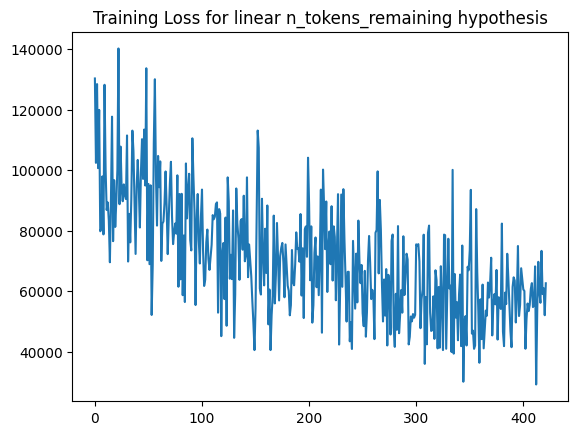

In [32]:
plt.title('Training Loss for linear n_tokens_remaining hypothesis')
plt.plot(losses)

In [62]:
# Evaluate test loss
test_losses = []
preds = []
actuals = []
model.eval()
with torch.no_grad():
    for X, y, total_tokens in test_dataloader:
        total_tokens = total_tokens.to('cuda', dtype=torch.float32)
        y = y.to('cuda', dtype=torch.float32)
        pred = model(X.to('cuda', dtype=torch.float32))
        tokens_already_seen = total_tokens - y
        percentage_pred = torch.clamp(pred/(pred + tokens_already_seen), 0.0, 1.0)
        actual_percentage = y/total_tokens
        loss = loss_fn(percentage_pred, actual_percentage)
        test_losses.append(loss.item())
        preds += percentage_pred[0].tolist()
        actuals += actual_percentage.tolist()
average_test_loss = sum(test_losses) / len(test_losses)
print(f"Average test loss: {average_test_loss:.4f}")


Average test loss: 0.3203


/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([41])) that is different to the input size (torch.Size([41, 41])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [63]:
for X, y, _ in test_dataloader:
    print(y)
    break

tensor([293, 117, 341, 178,  30, 129,  41, 265, 215, 472, 238, 197, 451,  35,
        356,   2,   9,  29, 190, 240, 286, 533, 247,  75,  39,  87,  61, 405,
        236, 186, 204,  28, 123, 476, 357, 578,  75, 316, 156, 167, 168,  23,
         52,  20, 272,  43, 293, 426,  52,  17,  79, 179, 290, 147,  14, 109,
        457, 107, 296, 299, 279,  48, 123, 343])


In [64]:
preds

[0.003416143823415041,
 0.028716236352920532,
 0.005878289230167866,
 0.19128000736236572,
 0.007822391577064991,
 0.006618493236601353,
 0.12427666038274765,
 0.010252423584461212,
 0.0038415214512497187,
 0.002935613039880991,
 0.008476519957184792,
 0.0062128398567438126,
 0.006587769370526075,
 0.019870467483997345,
 0.00879159476608038,
 0.0028358858544379473,
 0.006874999962747097,
 0.002449231455102563,
 0.006409254390746355,
 0.004374376963824034,
 0.011592400260269642,
 0.0031092725694179535,
 0.011592400260269642,
 0.03792529180645943,
 0.00879159476608038,
 0.004205842036753893,
 0.5866284966468811,
 0.011983972042798996,
 0.01471836119890213,
 0.0027112718671560287,
 1.0,
 0.41505613923072815,
 0.012512276880443096,
 0.011687874794006348,
 0.008737465366721153,
 0.060597099363803864,
 0.015523354522883892,
 0.006809027399867773,
 0.007337079383432865,
 0.0864315778017044,
 0.012623577378690243,
 0.016233649104833603,
 0.005667025223374367,
 0.0090726213529706,
 0.0305721256

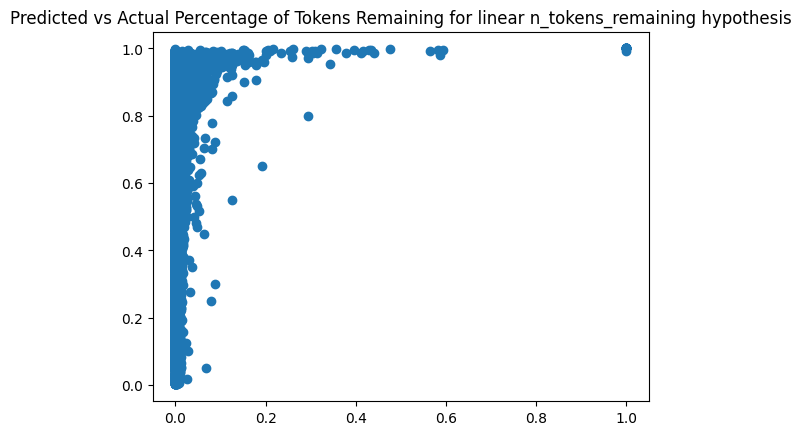

In [67]:
plt.title('Predicted vs Actual Percentage of Tokens Remaining for linear n_tokens_remaining hypothesis')
plt.scatter(preds, actuals)

## 3.2 Logarithmic n_tokens remaining

In [152]:
import matplotlib.pyplot as plt

In [157]:
class NonLinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = NonLinearRegression(train_dataset[0][0].shape[0]).to('cuda')

In [170]:
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [159]:
def evaluate_model(model, test_dataloader, loss_fn):
    preds = []
    actuals = []
    model.eval()
    with torch.no_grad():
        for X, y, total_tokens in test_dataloader:
            total_tokens = total_tokens.to('cuda', dtype=torch.float32)
            y = y.to('cuda', dtype=torch.float32)
            pred = model(X.to('cuda', dtype=torch.float32)).exp()
            preds += pred.flatten().tolist()
            actuals += (y+1).log().flatten().tolist()
    return preds, actuals

  0%|          | 0/422 [00:00<?, ?it/s]

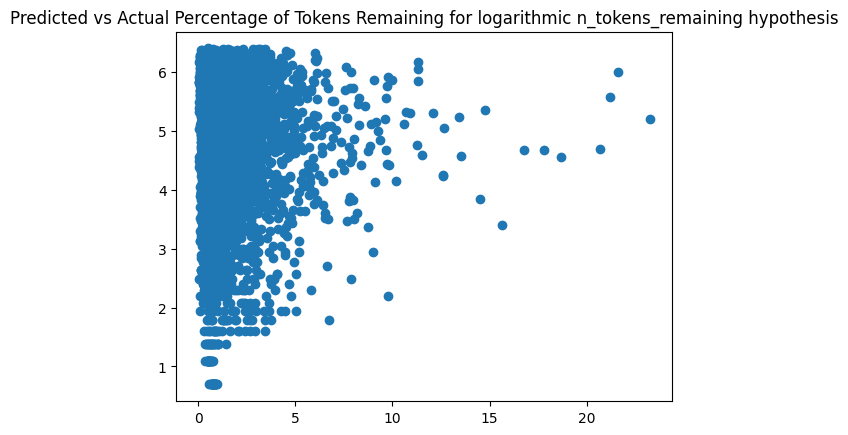

 12%|█▏        | 50/422 [00:06<00:49,  7.56it/s]

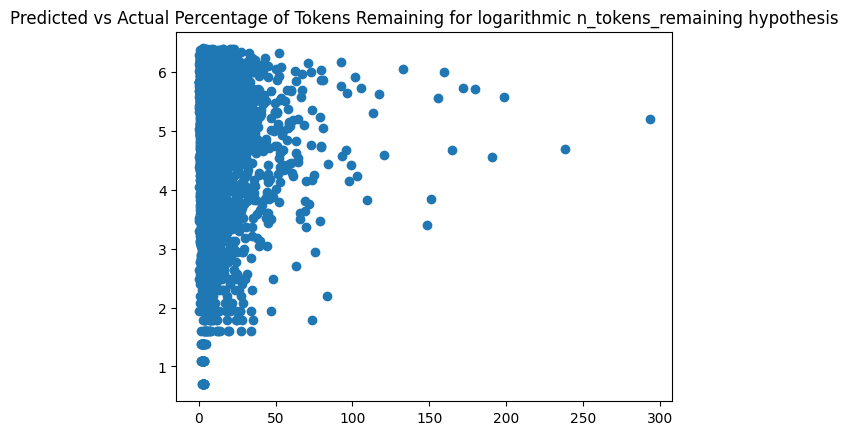

 24%|██▎       | 100/422 [00:13<00:43,  7.47it/s]

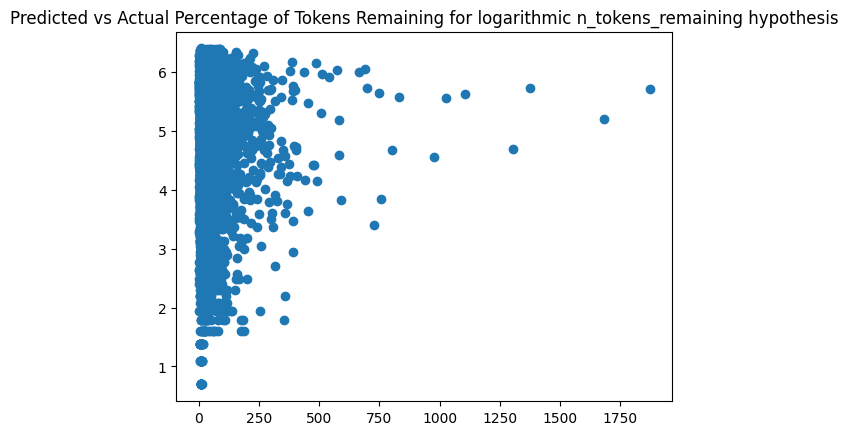

 28%|██▊       | 118/422 [00:16<00:41,  7.33it/s]


KeyboardInterrupt: 

In [160]:
losses = []

for i,(X, y, total_tokens) in enumerate(tqdm(train_dataloader)):
    y = y.to('cuda', dtype=torch.float32)
    total_tokens = total_tokens.to('cuda', dtype=torch.float32)
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, (y+1).log())
    loss.backward()
    adam.step()
    losses.append(loss.item())
    if i % 50 == 0:
        preds, actuals = evaluate_model(model, test_dataloader, loss_fn)
        plt.title('Predicted vs Actual Percentage of Tokens Remaining for logarithmic n_tokens_remaining hypothesis')
        plt.scatter(preds, actuals)
        plt.show()

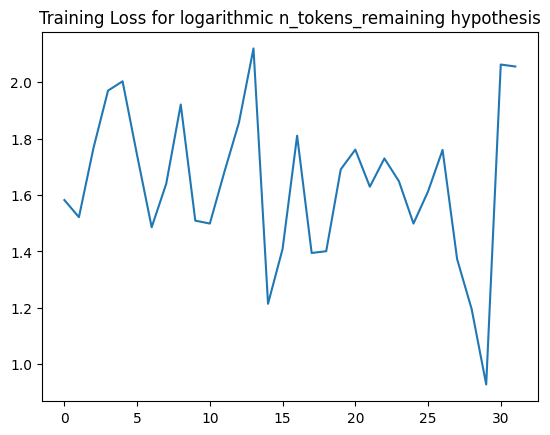

In [148]:
plt.title('Training Loss for logarithmic n_tokens_remaining hypothesis')
plt.plot(losses)

In [149]:
losses

[1.5821728706359863,
 1.5215047597885132,
 1.7669475078582764,
 1.9704666137695312,
 2.0035452842712402,
 1.7410311698913574,
 1.4857456684112549,
 1.639748454093933,
 1.9211320877075195,
 1.5091004371643066,
 1.4987671375274658,
 1.6820403337478638,
 1.8569215536117554,
 2.120006561279297,
 1.2142025232315063,
 1.4085485935211182,
 1.8105453252792358,
 1.3943766355514526,
 1.4006779193878174,
 1.6910302639007568,
 1.7610925436019897,
 1.6294690370559692,
 1.7297940254211426,
 1.6487996578216553,
 1.4988222122192383,
 1.6126222610473633,
 1.759974479675293,
 1.3724327087402344,
 1.1951273679733276,
 0.9277853965759277,
 2.0630064010620117,
 2.0561015605926514]

In [150]:
preds, actuals = evaluate_model(model, train_dataloader, loss_fn)

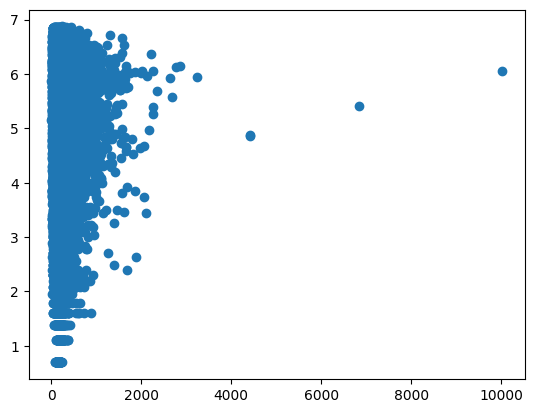

In [151]:
plt.scatter(preds, torch.tensor(actuals))

In [164]:
for X,y, _ in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([64, 2304]) torch.Size([64])


In [165]:
X

tensor([[-0.4393, -0.1185, -0.7637,  ..., -0.5523, -1.9968,  0.2930],
        [ 0.2284,  0.5505, -0.8176,  ...,  1.2768,  0.7874,  1.2934],
        [-0.5795,  0.2582,  0.0205,  ...,  0.8674, -0.2082, -1.3224],
        ...,
        [-0.5795,  0.1492,  0.2156,  ...,  1.4860, -0.0095, -1.0554],
        [-0.8186, -1.4592,  0.3324,  ...,  0.1479,  1.2593,  1.7201],
        [-2.6006, -0.2781,  1.8678,  ...,  0.6426, -1.5274,  1.6127]],
       device='cuda:0', grad_fn=<StackBackward0>)

## 3.5 rotation 

In [5]:
n_bins = 8


In [55]:
class LogBinClassifier(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, n_bins)

    def forward(self, x):
        return self.linear(x)
    
model = LogBinClassifier(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.0001)
weight = torch.tensor([8,7,6,5,4,3,2,3]).pow(torch.exp(torch.tensor(1.0))).to('cuda',dtype=torch.float32)
losses = []

In [56]:
def bin_y(y):
    return (y+1).log().floor().clamp(0,n_bins-1).to('cuda', dtype=torch.long)

In [57]:
loss_fn = nn.CrossEntropyLoss(weight = weight)

In [59]:
test_losses = []

for i, (X, y, _) in enumerate(train_dataloader):
    model.zero_grad()
    preds = model(X.to('cuda'))
    y_transformed = bin_y(y)
    loss = loss_fn(preds, y_transformed)
    loss.backward()
    adam.step()
    losses.append(loss.item())
    
    # Calculate test loss
    if i % 10 == 0:  # Calculate test loss every 10 batches
        model.eval()
        test_loss_sum = 0
        test_batches = 0
        with torch.no_grad():
            for X_test, y_test, _ in test_dataloader:
                preds_test = model(X_test.to('cuda'))
                y_test_transformed = bin_y(y_test)
                test_loss = loss_fn(preds_test, y_test_transformed)
                test_loss_sum += test_loss.item()
                test_batches += 1
        test_losses.append(test_loss_sum / test_batches)
        model.train()
    
    print(f"Batch {i}, Train Loss: {loss.item():.4f}")
    if i % 10 == 0 and test_losses:
        print(f"Test Loss: {test_losses[-1]:.4f}")

Batch 0, Train Loss: 1.6890
Test Loss: 1.7513
Batch 1, Train Loss: 1.8065
Batch 2, Train Loss: 1.4341
Batch 3, Train Loss: 1.5252
Batch 4, Train Loss: 1.5634
Batch 5, Train Loss: 2.0489
Batch 6, Train Loss: 1.3840
Batch 7, Train Loss: 1.5469
Batch 8, Train Loss: 1.6794
Batch 9, Train Loss: 1.6194
Batch 10, Train Loss: 1.7497
Test Loss: 1.7177
Batch 11, Train Loss: 1.7242
Batch 12, Train Loss: 1.8315
Batch 13, Train Loss: 1.6286
Batch 14, Train Loss: 1.9253
Batch 15, Train Loss: 1.6882
Batch 16, Train Loss: 1.6294
Batch 17, Train Loss: 1.3646
Batch 18, Train Loss: 1.6284
Batch 19, Train Loss: 1.6711
Batch 20, Train Loss: 1.8425
Test Loss: 1.6983
Batch 21, Train Loss: 1.5461
Batch 22, Train Loss: 1.7315
Batch 23, Train Loss: 1.6359
Batch 24, Train Loss: 1.7602
Batch 25, Train Loss: 1.9914
Batch 26, Train Loss: 1.4148
Batch 27, Train Loss: 1.4718
Batch 28, Train Loss: 1.5941
Batch 29, Train Loss: 1.4917
Batch 30, Train Loss: 1.4323
Test Loss: 1.6783
Batch 31, Train Loss: 1.4739
Batch 32, 

In [ ]:
import matplotlib.pyplot as plt

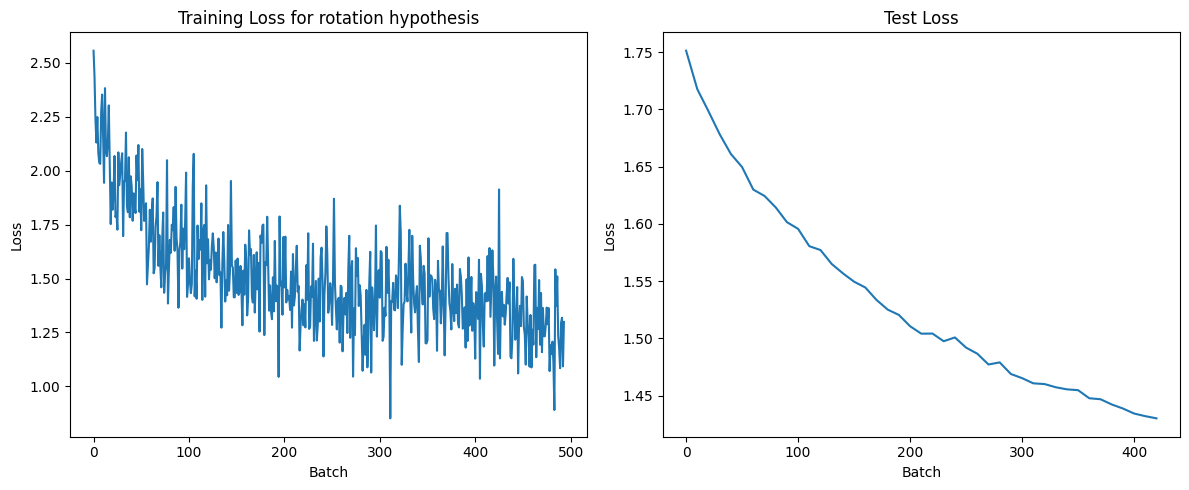

tensor([5, 5, 5, 6, 5, 5, 6, 3, 3, 6, 5, 1, 2, 5, 5, 5, 3, 3, 5, 6, 5, 6, 4, 5,
        5, 5, 5, 3, 5, 3, 5, 6, 5, 5, 2, 6, 6, 5, 4, 3, 4, 6], device='cuda:0')

In [61]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Training Loss for rotation hypothesis')
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Test Loss')
# Fix the x-axis to match the length of test_losses
test_x_values = [i for i in range(0, len(losses), 10) if i // 10 < len(test_losses)]
plt.plot(test_x_values, test_losses[:len(test_x_values)])
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

model.zero_grad()
preds = model(X.to('cuda'))
preds.argmax(dim=1)
y_transformed


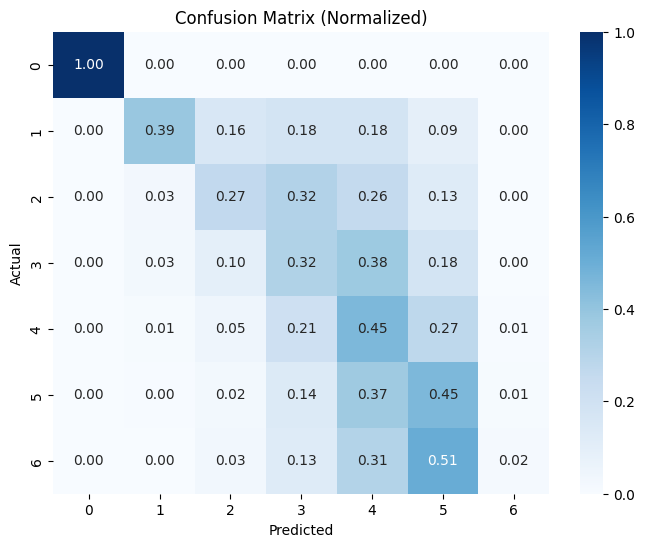

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

all_preds = []
all_targets = []

for X, y, _ in test_dataloader:
    with torch.no_grad():
        preds = model(X.to('cuda'))
        y_transformed = bin_y(y)
        all_preds.extend(preds.argmax(dim=1).cpu().numpy())
        all_targets.extend(y_transformed.cpu().numpy())

cm = confusion_matrix(all_targets, all_preds)
# Normalize each row so it sums to 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()